In [2]:
import numpy as np
import scipy.io
import sklearn

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

#for plots
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.xaxis.set_tick_params(size=6)
    ax.yaxis.set_tick_params(size=6)

colors=['#F5A21E', '#02A68E', '#EF3E34', '#134B64', '#FF07CD','b']

In [6]:
m1 = scipy.io.loadmat('/Users/adiraj95/Documents/Python/MLCourse_Data/m1_stevenson_2011.mat')

In [9]:
m1['time'] = m1['time'].squeeze()
m1['sampling_rate'] = 1/np.diff(m1['time']).mean()

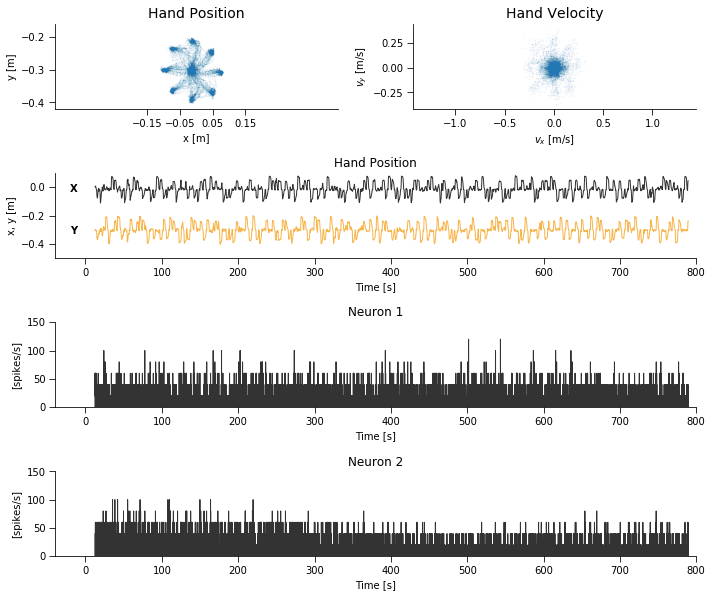

In [14]:

plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'medium'

# Position scatter
ts = 14
gs0 = gridspec.GridSpec(5, 2)
plt.subplot(gs0[0,0])
simpleaxis(plt.gca())
plt.scatter(m1['handPos'][0,:], m1['handPos'][1,:], s=.1, alpha=.1)

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')
plt.title('Hand Position',fontsize=ts)
plt.ylim([-0.42,-0.16])
plt.xlim([-0.15,0.15])
plt.xticks(np.arange(-0.15,0.2, .1))

# Velocity scatter
plt.subplot(gs0[0,1])
simpleaxis(plt.gca())
plt.scatter(m1['handVel'][0,:], m1['handVel'][1,:], s=.1, alpha=.1)

plt.xlabel('$v_x$ [m/s]')
plt.ylabel('$v_y$ [m/s]')
plt.axis('equal')
plt.title('Hand Velocity',fontsize=ts)

# Position trace
plt.subplot(gs0[1,:])
a=plt.gca()
simpleaxis(a)
a.text(-20,-.03,'X',weight='bold')
a.text(-20,-.33,'Y',weight='bold')
alpha = 0.8
lw = 1
plt.plot(m1['time'], m1['handPos'][0,:], 'k-', alpha=alpha, lw=lw)
plt.plot(m1['time'], m1['handPos'][1,:], '-', color=colors[0], alpha=alpha, lw=lw)
a.axis([-40,800,-0.5,0.1])

plt.xlabel('Time [s]')
plt.ylabel('x, y [m]')
plt.title('Hand Position')


# Neuron 1 firing rate
plt.subplot(gs0[2,:])
a=plt.gca()
simpleaxis(a)
alpha = 0.8
lw = 1
plt.plot(m1['time'], m1['sampling_rate']*m1['spikes'][0,:], 'k-', alpha=alpha, lw=lw)
a.axis([-40,800,0.0,150])

plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.title('Neuron 1')

# Neuron 1 firing rate
plt.subplot(gs0[3,:])
a=plt.gca()
simpleaxis(a)
alpha = 0.8
lw = 1
plt.plot(m1['time'], m1['sampling_rate']*m1['spikes'][2,:], 'k-', alpha=alpha, lw=lw)
a.axis([-40,800,0.0,150])

plt.xlabel('Time [s]')
plt.ylabel('[spikes/s]')
plt.title('Neuron 2')


plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.signal import medfilt

def plot_positions(t, Y_test, Y_predict):
    """Plots true and predicted hand positions over time"""
    plt.figure(figsize=(15,10))
    a=plt.gca()
    simpleaxis(a)
    a.text(np.min(t)-20,-.03,'X',weight='bold')
    a.text(np.min(t)-20,-.33,'Y',weight='bold')
    alpha = 0.9
    lw = 1
    plt.plot(t, medfilt(Y_predict.T[0,:], 5), 'c-', t, Y_test.T[0,:], 'm-', alpha=alpha, lw=lw)
    plt.plot(t, medfilt(Y_predict.T[1,:], 5), 'c-', t, Y_test.T[1,:], 'm-', alpha=alpha, lw=lw)
    plt.legend(['pred', 'true'])
    plt.xlabel('Time [s]')
    plt.ylabel('x, y [m]')
    plt.title('Hand Position')
    plt.show()
    
def mean_absolute_percentage_error(Y_test, Y_predict):
    return float(np.mean(np.abs((Y_test - Y_predict)/Y_predict)))

def score_positions(Y_test, Y_predict):
    """Scores given hand positions using standard metrics"""
    return (mean_squared_error(Y_test, Y_predict),
            mean_absolute_error(Y_test, Y_predict),
            r2_score(Y_test, Y_predict),
            mean_absolute_percentage_error(Y_test, Y_predict))

In [12]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import linear_model

# load data (X is neural activity, Y is hand position response)
Y = m1['handPos'].T[:,0:2]
X = m1['spikes'].T
t = m1['time']

# Generate 5 different splits of your data into train and test data sets for cross validation
tscv = TimeSeriesSplit(n_splits=5)

# iterate through time splits and train/predict
for train_index, test_index in tscv.split(t):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    t_train, t_test = t[train_index], t[test_index]
    
    """
    Fit your linear regression model here, extract relevant metrics and plot test performance.
    """
    

In [17]:
m1['spikes'].shape

(171, 15536)

In [49]:
X_test.shape

(2589, 171)